In [ ]:
#!pip install pyarrow
#!pip install fastparquet
#!pip install lightgbm

In [133]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [40]:
with ZipFile('archive (1).zip', 'r') as file:
    file.extractall()

In [239]:
df = pd.read_parquet('multisimmers.parquet')

In [148]:
pd.set_option('display.max_column', None)

In [6]:
df

,subscriber_id,trf,age,gndr,tenure,var_5,dev_man,device_os_name,var_8,is_dualsim,is_featurephone,is_smartphone,simcard_type,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,region,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200,target,var_202,var_203,var_204,var_205,var_206,var_207,var_208,var_209,var_210,is_bundle_trf
0,6961546617278,2,64,M,6384.0,1507,Samsung,Android OS,1,1,0,1,4G,298.0,678.0,1080.0,2008.0,276.2,669.2,978.5,1892.6,74.50,84.75,90.00,83.67,0.9,1.0,0.9,0.9,112.0,281.0,485.0,912.0,127.0,299.3,455.8,913.0,28.00,35.13,40.42,38.00,1.1,1.1,0.9,1.0,4.0,9.0,13.0,24.0,4.5,8.0,10.5,22.2,1.00,1.13,1.08,1.00,1.1,0.9,0.8,0.9,40.0,93.0,152.0,272.0,396.36,710.90,831.14,1014.69,11.33,25.36,35.68,62.64,1,0.0,NaN,5.2,12.0,27.00,36.00,57.00,4.0,9.0,12.0,19.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,131.5,0,0,0,396,3,0,0,0,0,0,0,0,0,0,0,0,89,0,0,0,18,58,42,0,15.00,7.62,0.14,0,0,0,0,0,0,0,0,0.0,3.0,0.00,0.0,0,0.00,0,0.0,0,0.0,64,0.0,3,0.0,0.29,6.88,0.05,0.24,0.004272,0.00,0.00,0.000000,0.0,0.0,3.00,0.0,0,0.55,1,0.0,0,0.0,190,4.8,12,0.0,0.78,24.39,0.10,0.68,0.038863,0.00,0.00,0.220027,0.0,0.0,9.00,0.0,0,2.20,4,0.0,0,0.0,383,41.4,17,0.0,1.52,44.16,0.15,1.34,0.038863,0.00,0.00,0.220027,0.0,0.0,0,0,0,3.00,9.00,0,0,15.00,0,0,0
1,6961536724304,16,35,M,6180.0,565,Samsung,Android OS,1,1,0,1,None,484.0,998.0,1559.0,3072.0,668.9,1285.6,2139.7,4185.6,121.00,124.75,129.92,128.00,1.4,1.3,1.4,1.4,245.0,526.0,806.0,1643.0,302.5,631.0,1017.0,2132.2,61.25,65.75,67.17,68.46,1.2,1.2,1.3,1.3,19.0,58.0,86.0,156.0,21.5,66.4,108.2,193.5,4.75,7.25,7.17,6.50,1.1,1.1,1.3,1.2,34.0,70.0,116.0,242.0,53.85,2247.46,4182.41,9356.48,10.01,30.00,51.98,97.54,0,0.0,NaN,12.2,10.0,20.00,50.00,95.00,1.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,324.0,0,0,0,0,53,53,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,0,0,0,2.00,0.75,0.05,0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.0,0,0.00,0,0.0,0,0.0,8,0.0,0,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.00,0.0,0,8.80,9,10.0,0,0.0,54,8.7,1,0.0,0.00,0.78,0.00,0.00,0.142293,0.00,0.00,0.000000,0.0,0.0,0.00,0.0,0,10.23,14,11.0,0,0.0,126,15.3,3,0.0,0.12,3.84,0.06,0.00,3.087719,0.10,0.00,0.000000,0.0,0.0,0,0,0,0.00,0.00,0,0,2.00,2,0,1
2,6961523183000,0,26,M,1534.0,1078,Samsung,Android OS,1,1,0,1,4G,7.0,11.0,41.0,117.0,4.5,29.5,123.6,352.2,1.75,1.38,3.42,4.88,0.6,2.7,3.0,3.0,0.0,0.0,2.0,8.0,0.0,0.0,1.0,7.4,0.00,0.00,0.17,0.33,0.0,0.0,0.5,0.9,1.0,1.0,9.0,9.0,0.5,0.5,6.2,6.2,0.25,0.13,0.75,0.38,0.5,0.5,0.7,0.7,63.0,82.0,133.0,242.0,1913.52,2041.40,2849.79,3227.02,5.17,6.22,10.73,14.03,1,2.6,NaN,32.5,0.0,4.00,8.00,12.00,0.0,2.0,4.0,7.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.6,0,0,0,0,209,0,0,1913,0,39,2,0,92,0,0,0,42,0,0,1,0,43,1380,0,9.40,0.06,0.08,0,0,0,0,130,1,21,1,0.0,

# EDA and Data Manipulation

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52835 entries, 0 to 52834
Data columns (total 212 columns):
 #    Column           Dtype   
---   ------           -----   
 0    subscriber_id    int64   
 1    trf              int64   
 2    age              object  
 3    gndr             object  
 4    tenure           float64 
 5    var_5            object  
 6    dev_man          object  
 7    device_os_name   object  
 8    var_8            object  
 9    is_dualsim       category
 10   is_featurephone  object  
 11   is_smartphone    category
 12   simcard_type     object  
 13   var_13           float64 
 14   var_14           float64 
 15   var_15           float64 
 16   var_16           float64 
 17   var_17           float64 
 18   var_18           float64 
 19   var_19           float64 
 20   var_20           float64 
 21   var_21           float64 
 22   var_22           float64 
 23   var_23           float64 
 24   var_24           float64 
 25   var_25           flo

In [240]:
df.set_index('subscriber_id', drop=True, inplace=True)

Printing the names of unmasked columns

In [241]:
cols = list(df.columns)
df.columns[~np.char.startswith(cols, 'var')]

Index(['trf', 'age', 'gndr', 'tenure', 'dev_man', 'device_os_name',
       'is_dualsim', 'is_featurephone', 'is_smartphone', 'simcard_type',
       'region', 'target', 'is_bundle_trf'],
      dtype='object')

Converting columns into appropriate data types

In [242]:
print(df.columns[np.char.startswith(cols, 'is')])
df[df.columns[np.char.startswith(cols, 'is')]] = df[df.columns[np.char.startswith(cols, 'is')]].astype('category')

Index(['is_dualsim', 'is_featurephone', 'is_smartphone', 'is_bundle_trf'], dtype='object')


In [243]:
dist_of_target_by_trf = df.groupby('trf', as_index=False)['target'].value_counts(normalize=True)
dist_of_target_by_trf

,trf,target,proportion
0,0,1,0.687274
1,0,0,0.312726
2,1,1,0.667932
3,1,0,0.332068
4,2,1,0.512401
5,2,0,0.487599
6,3,1,0.647310
7,3,0,0.352690
8,4,1,0.637037
9,4,0,0.362963


In [244]:
def group_trf(row):
    if row['target']==1:
        if row['proportion']>=0.70:
              return 'high'
        if row['proportion']>=0.60:
              return 'medium'
        return 'low'

In [245]:
dist_of_target_by_trf['group'] = dist_of_target_by_trf.apply(group_trf, axis=1)
dist_of_target_by_trf.query('target==1')

,trf,target,proportion,group
0,0,1,0.687274,medium
2,1,1,0.667932,medium
4,2,1,0.512401,low
6,3,1,0.647310,medium
8,4,1,0.637037,medium
10,5,1,0.660954,medium
12,6,1,0.801802,high
14,7,1,0.724888,high
16,8,1,1.000000,high
17,9,1,0.644967,medium


In [246]:
trf_groups = dict(dist_of_target_by_trf.query('target==1')[['trf', 'group']].values)
df['trf'] = df['trf'].map(trf_groups)

In [177]:
df['trf'].value_counts()

medium    24844
low       21192
high       6797
Name: trf, dtype: int64

In [247]:
dist_of_target_by_region = df.groupby('region', as_index=False)['target'].value_counts(normalize=True)
dist_of_target_by_region

,region,target,proportion
0,0,1,0.693071
1,0,0,0.306929
2,1,0,0.685934
3,1,1,0.314066
4,2,0,0.672269
...,...,...,...
113,56,0,0.443114
114,57,1,0.534591
115,57,0,0.465409
116,58,0,0.674286


In [248]:
def group_regions(row):
    if row['target']==1:
        if row['proportion']>=0.65:
              return 'high'
        if row['proportion']>=0.5:
              return 'medium'
        return 'low'

In [249]:
dist_of_target_by_region['group'] = dist_of_target_by_region.apply(group_regions, axis=1)
dist_of_target_by_region.query('target==1')

,region,target,proportion,group
0,0,1,0.693071,high
3,1,1,0.314066,low
5,2,1,0.327731,low
7,3,1,0.438424,low
8,4,1,0.560976,medium
10,5,1,0.525581,medium
13,6,1,0.441253,low
14,7,1,0.685182,high
17,8,1,0.374194,low
19,9,1,0.377273,low


In [250]:
region_groups = dict(dist_of_target_by_region.query('target==1')[['region', 'group']].values)
df['region'] = df['region'].map(region_groups)

In [182]:
df['region'].value_counts()

high      34572
low        9934
medium     8329
Name: region, dtype: int64

In [251]:
df[['region', 'trf']] = df[['region', 'trf']].astype('category')

Missing values are represented as `None`. Replacing them with numpy's nan 

In [252]:
df.fillna(np.nan, inplace=True)

Checking if there is any duplicated rows

In [50]:
df.duplicated().sum()

0

In [51]:
df.select_dtypes(exclude='number')

,trf,age,gndr,var_5,dev_man,device_os_name,var_8,is_dualsim,is_featurephone,is_smartphone,simcard_type,var_69,var_70,var_71,var_72,region,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,is_bundle_trf
subscriber_id,,,,,,,,,,,,,,,,,,,,,,,,,
6961546617278,2,64,M,1507,Samsung,Android OS,1,1,0,1,4G,11.33,25.36,35.68,62.64,1,0,0,0,0,0,0,0,0,0
6961536724304,16,35,M,565,Samsung,Android OS,1,1,0,1,NaN,10.01,30.00,51.98,97.54,0,0,0,0,0,0,0,0,0,1
6961523183000,0,26,M,1078,Samsung,Android OS,1,1,0,1,4G,5.17,6.22,10.73,14.03,1,0,0,0,0,130,1,21,1,0
6961605994099,2,36,M,1219,Xiaomi,Android OS,1,1,0,1,3G,15.52,29.70,43.17,88.51,35,0,2,0,4,0,0,0,0,0
6961591989199,0,38,M,145,Samsung,Android OS,1,1,0,1,4G,2.63,5.19,8.43,20.92,7,0,0,0,0,38,0,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961631324236,2,51,M,614,Xiaomi,Android OS,1,1,0,1,4G,0.82,3.35,3.95,15.29,29,0,0,0,0,30,0,0,0,0
6961538770936,2,59,M,99,Samsung,Proprietary,1,1,1,0,3G,1.46,3.71,5.10,20.10,25,0,0,0,0,42,0,5,0,0
6961532312715,3,51,U,365,Xiaomi,Android OS,1,1,0,1,4G,2.69,7.22,9.22,29.10,48,0,0,0,0,78,6,2,0,1


In [253]:
cols_convert_to_numeric = df.select_dtypes('O').columns
cols_convert_to_numeric = cols_convert_to_numeric[~cols_convert_to_numeric.isin(['gndr',
                                                                                 'dev_man',
                                                                                 'device_os_name',
                                                                                 'is_dualsim',
                                                                                 'is_featurephone',
                                                                                 'is_smartphone',
                                                                                 'simcard_type',
                                                                                 'region',
                                                                                 'trf'])]
df[cols_convert_to_numeric] = df[cols_convert_to_numeric].astype('float')

In [49]:
df._get_numeric_data()

,age,tenure,var_5,var_8,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200,target,var_202,var_203,var_204,var_205,var_206,var_207,var_208,var_209,var_210
subscriber_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6961546617278,64.0,6384.0,1507.0,1.0,298.0,678.0,1080.0,2008.0,276.2,669.2,978.5,1892.6,74.50,84.75,90.00,83.67,0.9,1.0,0.9,0.9,112.0,281.0,485.0,912.0,127.0,299.3,455.8,913.0,28.00,35.13,40.42,38.00,1.1,1.1,0.9,1.0,4.0,9.0,13.0,24.0,4.5,8.0,10.5,22.2,1.00,1.13,1.08,1.00,1.1,0.9,0.8,0.9,40.0,93.0,152.0,272.0,396.36,710.90,831.14,1014.69,11.33,25.36,35.68,62.64,0.0,NaN,5.2,12.0,27.00,36.00,57.00,4.0,9.0,12.0,19.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,131.5,0,0,0,396,3,0,0,0,0,0,0,0,0,0,0,0,89,0,0,0,18,58,42,0,15.00,7.62,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.00,0.0,0,0.00,0,0.0,0,0.0,64,0.0,3,0.0,0.29,6.88,0.05,0.24,0.004272,0.00,0.00,0.000000,0.0,0.0,3.00,0.0,0,0.55,1,0.0,0,0.0,190,4.8,12,0.0,0.78,24.39,0.10,0.68,0.038863,0.00,0.00,0.220027,0.0,0.0,9.00,0.0,0,2.20,4,0.0,0,0.0,383,41.4,17,0.0,1.52,44.16,0.15,1.34,0.038863,0.00,0.00,0.220027,0.0,0.0,0,0,0,3.00,9.00,0,0,15.00,0,0
6961536724304,35.0,6180.0,565.0,1.0,484.0,998.0,1559.0,3072.0,668.9,1285.6,2139.7,4185.6,121.00,124.75,129.92,128.00,1.4,1.3,1.4,1.4,245.0,526.0,806.0,1643.0,302.5,631.0,1017.0,2132.2,61.25,65.75,67.17,68.46,1.2,1.2,1.3,1.3,19.0,58.0,86.0,156.0,21.5,66.4,108.2,193.5,4.75,7.25,7.17,6.50,1.1,1.1,1.3,1.2,34.0,70.0,116.0,242.0,53.85,2247.46,4182.41,9356.48,10.01,30.00,51.98,97.54,0.0,NaN,12.2,10.0,20.00,50.00,95.00,1.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,324.0,0,0,0,0,53,53,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,0,0,0,2.00,0.75,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.00,0,0.0,0,0.0,8,0.0,0,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.00,0.0,0,8.80,9,10.0,0,0.0,54,8.7,1,0.0,0.00,0.78,0.00,0.00,0.142293,0.00,0.00,0.000000,0.0,0.0,0.00,0.0,0,10.23,14,11.0,0,0.0,126,15.3,3,0.0,0.12,3.84,0.06,0.00,3.087719,0.10,0.00,0.000000,0.0,0.0,0,0,0,0.00,0.00,0,0,2.00,2,0
6961523183000,26.0,1534.0,1078.0,1.0,7.0,11.0,41.0,117.0,4.5,29.5,123.6,352.2,1.75,1.38,3.42,4.88,0.6,2.7,3.0,3.0,0.0,0.0,2.0,8.0,0.0,0.0,1.0,7.4,0.00,0.00,0.17,0.33,0.0,0.0,0.5,0.9,1.0,1.0,9.0,9.0,0.5,0.5,6.2,6.2,0.25,0.13,0.75,0.38,0.5,0.5,0.7,0.7,63.0,82.0,133.0,242.0,1913.52,2041.40,2849.79,3227.02,5.17,6.22,10.73,14.03,2.6,NaN,32.5,0.0,4.00,8.00,12.00,0.0,2.0,4.0,7.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.6,0,0,0,0,209,0,0,1913,0,39,2,0,92,0,0,0,42,0,0,1,0,43,1380,0,9.40,0.06

In [55]:
df.describe()

,age,tenure,var_5,var_8,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200,target,var_202,var_203,var_204,var_205,var_206,var_207,var_208,var_209,var_210
count,52587.000000,52825.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,5.283500e+04,52835.000000,52835.000000,52835.000000,52835.000000,52827.000000,711.000000,52429.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.0,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.0,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,49311.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,5.283500e+04,5.283500e+04,5.283500e+04,5.283500e+04,52835.000000,5.283500e+04,52835.000000,52835.000000,52835.000000,52835.0,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,5.283500e+04,5.283500e+04,5.283500e+04,5.283500e+04,52835.000000,5.283500e+04,5.283500e+04,52835.000000,52835.000000,52835.0,5.283500e+04,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,52835.00000,52835.000000,52835.000000,52835.000000,52835.000000,52835.000000,5.283500e+04,5.283500e+04,5.283500e+04,5.283500e+04,52835.000000,5.283500e+04,5.283500e+04,52835.000000,52835.000000,52835.0,52835.000000,52835.000000,

Since minimum legal age for sim card registration is 18, anything below 18 must be false data and any age above 90 is likely to be erroneous as well.

In [52]:
df.loc[df['age']>90]

,trf,age,gndr,tenure,var_5,dev_man,device_os_name,var_8,is_dualsim,is_featurephone,is_smartphone,simcard_type,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,region,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200,target,var_202,var_203,var_204,var_205,var_206,var_207,var_208,var_209,var_210,is_bundle_trf
subscriber_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6961601087785,low,97.0,M,2893.0,84.0,Hedy,Proprietary,2.0,0,1,0,3G,252.0,379.0,700.0,1769.0,1857.1,2339.4,4030.8,9477.6,63.00,47.38,58.33,73.71,7.4,6.2,5.8,5.4,41.0,71.0,132.0,358.0,213.7,331.9,738.5,1846.9,10.25,8.88,11.00,14.92,5.2,4.7,5.6,5.2,5.0,11.0,15.0,62.0,26.8,31.5,44.4,131.8,1.25,1.38,1.25,2.58,5.4,2.9,3.0,2.1,33.0,71.0,94.0,211.0,0.00,0.01,0.01,0.01,4.31,7.82,11.95,34.02,low,0.0,NaN,18.6,3.0,5.0,9.00,29.00,2.0,4.0,6.0,20.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,240.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.14,4.86,1.21,0.0,0.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0,0.22,1,1.5,0,0.0,49,161.4,12,0.0,1.40,2.82,1.32,0.08,0.000000,0.05,0.00,0.000000,0.0,0.0,0.02,0.0,0,0.22,1,3.0,0,0.0,119,513.2,41,0.0,2.43,9.15,1.96,0.47,0.000000,0.05,0.00,0.000000,0.0,0.0,0.14,2.0,2,1.54,3,6.4,0,0.0,285,1220.0,85,0.0,7.69,25.34,5.63,2.06,0.000000,0.05,0.00,0.000000,0.0,0.0,0,1,0,0.02,0.14,1,0,0.14,1,0,0
6961522437584,low,1946.0,M,7922.0,995.0,Samsung,Proprietary,1.0,1,1,0,NaN,250.0,478.0,688.0,1242.0,152.0,295.9,431.5,744.2,62.50,59.75,57.33,51.75,0.6,0.6,0.6,0.6,19.0,42.0,64.0,105.0,7.3,21.0,39.2,62.3,4.75,5.25,5.33,4.38,0.4,0.5,0.6,0.6,53.0,110.0,152.0,271.0,44.0,80.0,102.1,174.6,13.25,13.75,12.67,11.29,0.8,0.7,0.7,0.6,28.0,44.0,63.0,133.0,0.00,0.00,0.00,0.00,9.15,18.17,25.87,44.59,high,0.1,NaN,6.3,8.0,18.0,25.00,45.00,2.0,4.0,6.0,10.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,51.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,1.68,4.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.00,0,0.0,0,0.0,15,2.0,1,0.0,7.00,2.00,2.30,4.70,0.000000,0.10,0.05,0.000000,0.0,0.0,0.00,0.0,0,0.00,0,0.0,0,0.0,56,4.7,3,0.0,18.02,7.70,5.20,12.72,0.000000,0.10,0.05,0.000000,0.0,0.0,0.00,0.0,0,0.00,0,0.0,0,0.0,82,4.7,5,0.0,32.04,12.40,10.50,21.24,0.000000,0.10,0.05,0.000000,0.0,0.0,0,2,1,0.00,0.00,2,1,0.00,2,1,0
6961595273368,low,119.0,M,3235.0,1030.0,Samsung,Android OS,1.0,1,0,1,3G,36.0,139.0,199.0,275.0,56.7,329.9,402.4,529.9,9.00,17.38,16.58,11.46,1.6,2.4,2.0,1.9,0.0,13.0,19.0,35.0,0.0,54.0,71.0,119.0,0.00,1.63,1.58,1.46,0.0,4.2,3.7,3.4,0.0,29.0,32.0,32.0,0.0,22.4,25.0,25.0,0.00,3.63,2.67,1.33,0.0,0.8,0.8,0.8,16.0,193.0,231.0,276.0,

In [254]:
df.loc[df['age']>1900, 'age'] = 2023 - df.loc[df['age']>1900, 'age']

In [255]:
df.loc[(df['age']<18) | (df['age']>90), 'age'] = np.nan

In [56]:
def calculate_missing_rate(data):
    missing_values = data.isna().mean().sort_values(ascending=False)
    return missing_values[missing_values>0].to_frame().rename({0:'Missing %'}, axis=1)

In [57]:
calculate_missing_rate(df)

,Missing %
var_75,0.986543
simcard_type,0.070067
var_133,0.066698
var_76,0.007684
age,0.005527
dev_man,0.000795
device_os_name,0.000795
tenure,0.000189
var_74,0.000151
trf,0.000038


In [256]:
df.drop('var_75', axis=1, inplace=True)

In [257]:
categoric_cols = df.select_dtypes(exclude='number').columns
numeric_cols = df.select_dtypes('number').columns

# Outlier detection and handling

In [258]:
def get_z_score(data):
    z_scores = (data - data.mean()) / data.std()
    return z_scores

In [259]:
df_z_scores = get_z_score(df._get_numeric_data())

In [260]:
threshold = 3
for col in df._get_numeric_data().columns:
    capped_value = np.percentile(df[col], 95)
    df[col] = np.where(abs(df_z_scores[col]) > threshold, capped_value, df[col])

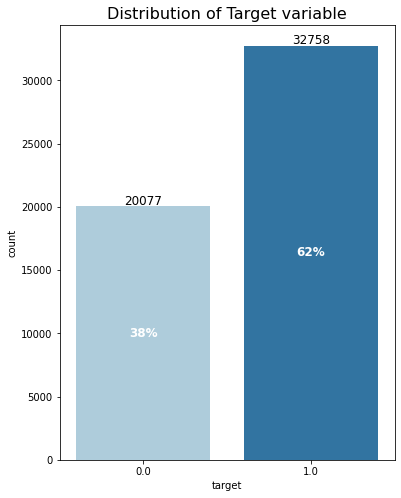

In [68]:
plt.figure(figsize=(6, 8))
ax = sns.countplot(data=df, x='target', palette='Paired')
ax.set_title('Distribution of Target variable', fontsize=16)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12,
                xytext=(0, 5), textcoords='offset points')
    
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2,
            f'{p.get_height() / len(df) * 100:.0f}%', ha='center', va='center', fontsize=12,
            color='white', fontweight='bold')

Based on the distribution of the target column we can conclude that the data is slightly imbalanced.

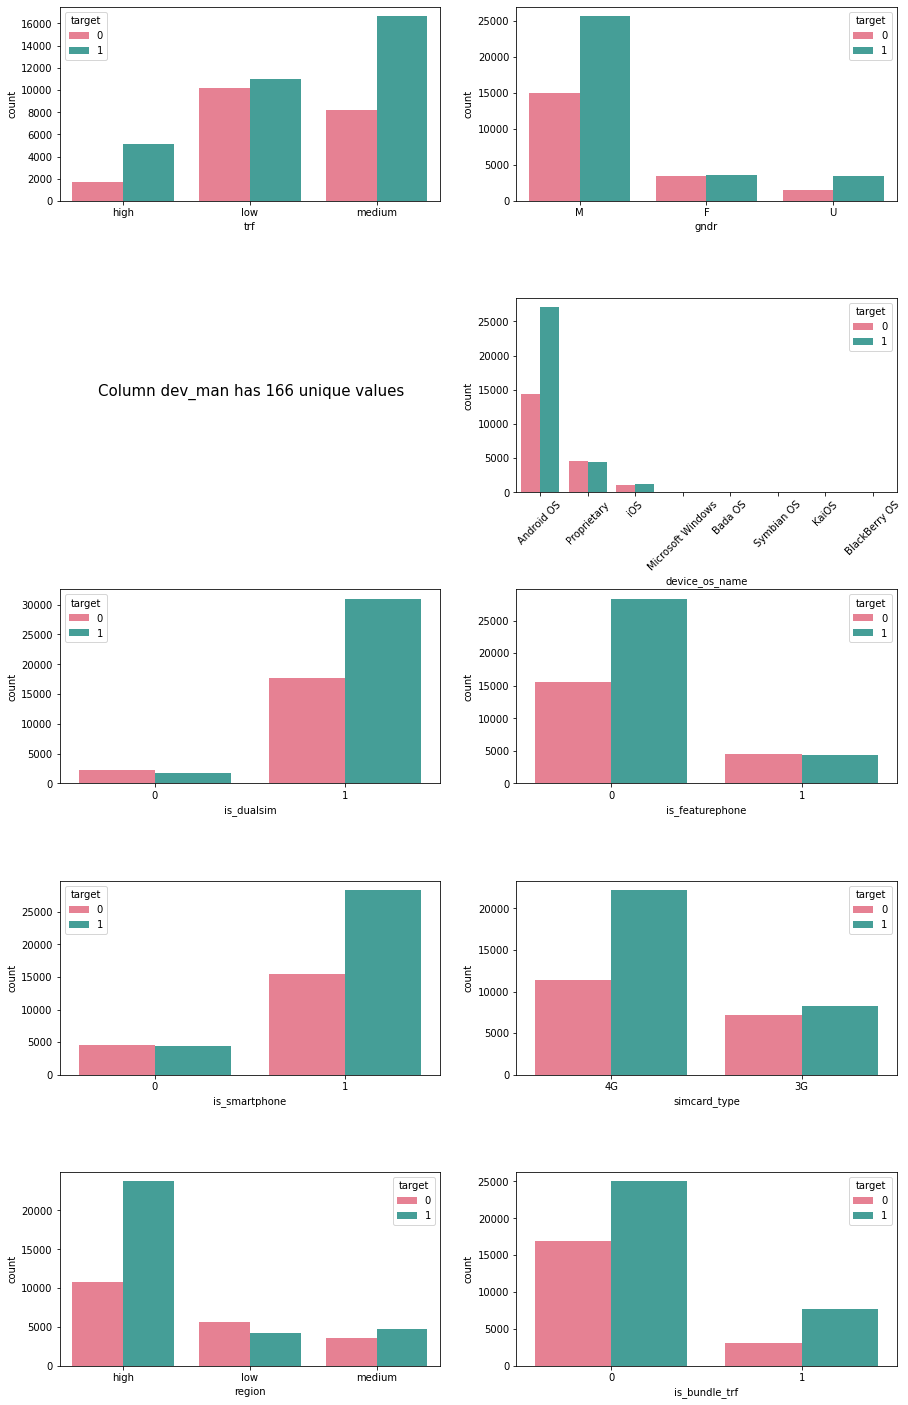

In [190]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)
for idx, col in enumerate(categoric_cols):
    uniqe_cnt = df[col].nunique()
    if uniqe_cnt<=10:
        sns.countplot(data=df,
                      x=col,
                      hue='target',
                      ax=axes[idx//2, idx%2],
                      palette='husl')
        axes[idx//2, idx%2].tick_params(axis='x', rotation=max((uniqe_cnt-5)*15, 0))
    else:
        axes[idx//2, idx%2].text(0.1, 0.5, f'Column {col} has {uniqe_cnt} unique values', fontsize=15)
        axes[idx//2, idx%2].axis('off')
    

In [261]:
def lower_variability(data, col, thresh=0.02):
    values_to_replace = data[col].value_counts(normalize=True)[data[col].value_counts(normalize=True)<0.02].index
    data.loc[data[col].isin(values_to_replace), col] = 'Other'

In [262]:
for col in ['dev_man', 'device_os_name']:
    lower_variability(df, col)

In [76]:
#df['dev_man'].value_counts()
#df['device_os_name'].value_counts()

Android OS     41480
Proprietary     8929
iOS             2303
Other             81
Name: device_os_name, dtype: int64

In [ ]:
fig, axes = plt.subplots(nrows=68, ncols=3, figsize=(17, 500))
for i, col in enumerate(numeric_cols[1:]):
    sns.violinplot(data=df,
                y=col,
                x='target',
                palette='summer',
                ax=axes[i//3, i%3])
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel(col, fontsize=14)

It's detected that some columns are entirely consisted of zeros which are dropped from the dataframe.

In [77]:
numeric_cols[(df[numeric_cols].sum(axis=0)==0).values]

Index(['var_89', 'var_90', 'var_91', 'var_92', 'var_104', 'var_116', 'var_127',
       'var_133', 'var_156', 'var_178', 'var_200'],
      dtype='object')

In [78]:
df[['var_104', 'var_116', 'var_156', 'var_178', 'var_200']]

,var_104,var_116,var_156,var_178,var_200
subscriber_id,,,,,
6961546617278,0.0,0.0,0.0,0.0,0.0
6961536724304,0.0,0.0,0.0,0.0,0.0
6961523183000,0.0,0.0,0.0,0.0,0.0
6961605994099,0.0,0.0,0.0,0.0,0.0
6961591989199,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6961631324236,0.0,0.0,0.0,0.0,0.0
6961538770936,0.0,0.0,0.0,0.0,0.0
6961532312715,0.0,0.0,0.0,0.0,0.0


In [263]:
df.drop(['var_104', 'var_116', 'var_156', 'var_178', 'var_200'], axis=1, inplace=True)
numeric_cols = df.drop('target', axis=1).select_dtypes('number').columns

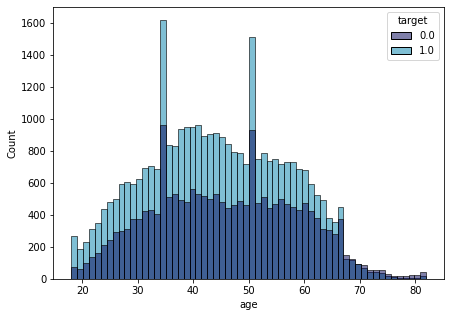

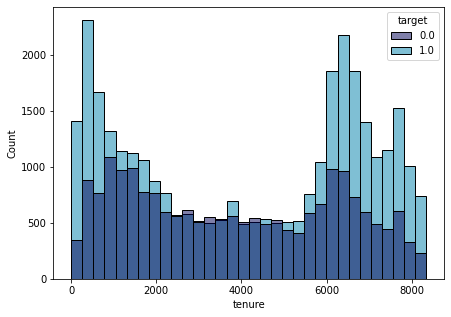

In [80]:
for col in ['age', 'tenure']:
    plt.figure(figsize=(7, 5))
    sns.histplot(data=df,
                 x=col,
                 hue='target',
                 palette='ocean')
    plt.show()

### Binning high variance features

In [264]:
cols_to_bin = (df._get_numeric_data()
                .var()
                .sort_values(ascending=False)[:11].index)

In [265]:
cols_to_bin

Index(['var_68', 'var_67', 'var_66', 'var_65', 'tenure', 'var_20', 'var_101',
       'var_16', 'var_36', 'var_105', 'var_19'],
      dtype='object')

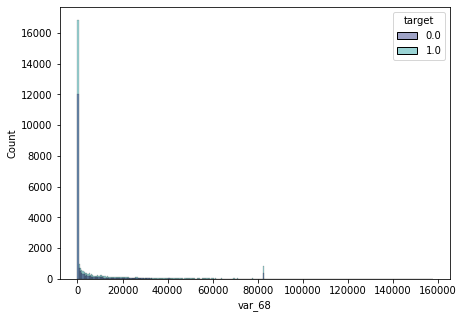

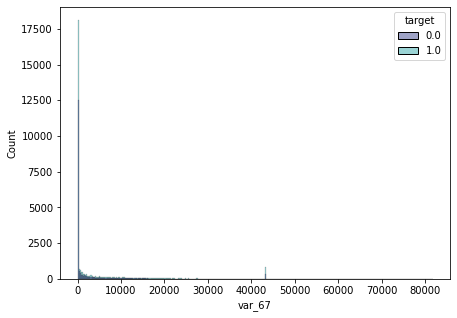

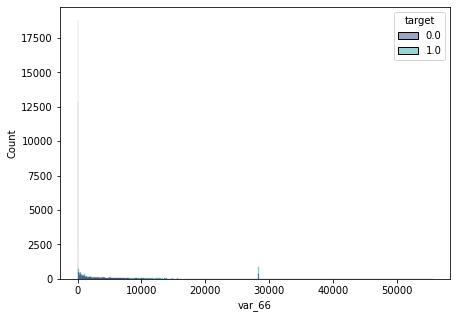

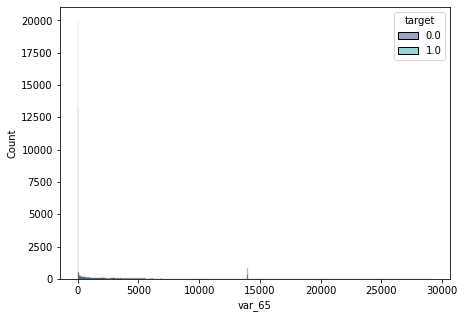

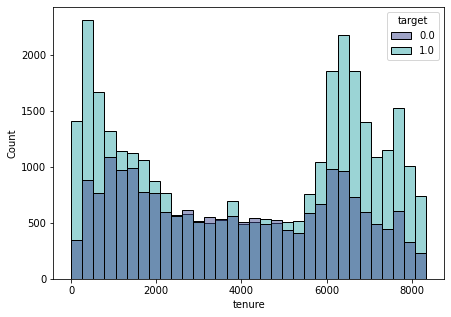

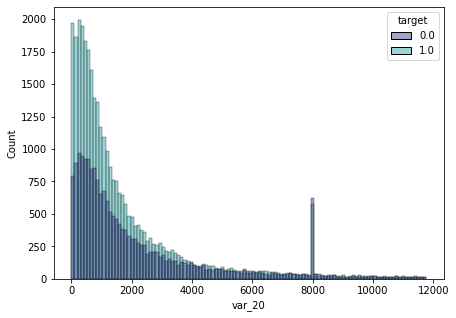

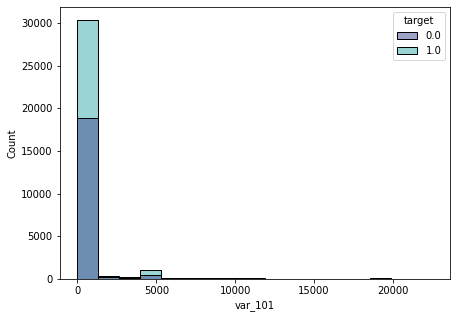

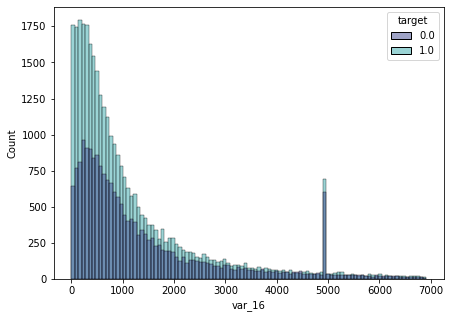

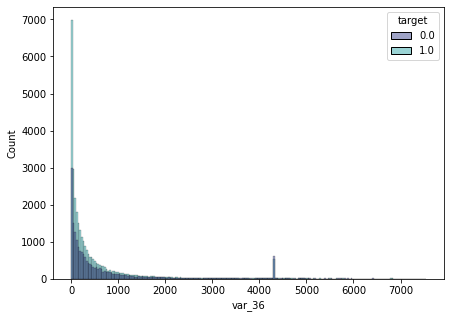

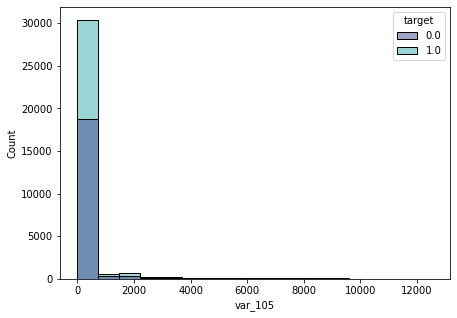

In [89]:
for col in cols_to_bin:
    plt.figure(figsize=(7, 5))
    sns.histplot(data=df,
                 x=col,
                 hue='target',
                 palette='mako')
    plt.show()

In [266]:
for col in cols_to_bin:
    temp = pd.qcut(df[col], q=5, duplicates='drop')
    df[col] = pd.qcut(df[col], q=5, duplicates='drop', labels=range(temp.nunique()))

In [224]:
#df['age'] = pd.qcut(df['age'], q=3)

Dropping columns with very low variance

In [267]:
X = df.drop('target', axis=1)
y = df['target']

print('Shape of input data before: ', X.shape)
numeric_cols = X._get_numeric_data().columns
categoric_cols = X.select_dtypes(exclude='number').columns
vt = VarianceThreshold(threshold=3)
vt.fit(X[numeric_cols])
high_var_cols = vt.get_feature_names_out()
X = X.drop(X.columns[(~X.columns.isin(high_var_cols)) & (~X.columns.isin(categoric_cols))], axis=1)
print('Shape of input data after: ', X.shape)

Shape of input data before:  (52835, 204)
Shape of input data after:  (52835, 143)


# Train test split

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Handling missing values

In [269]:
numeric_cols = X._get_numeric_data().columns
categoric_cols = X.select_dtypes(exclude='number').columns

cat_null_cols = categoric_cols[np.nonzero(X[categoric_cols].isna().sum().values)].to_list()
print('Categoric columns having missing values:\n', cat_null_cols)

num_null_cols = numeric_cols[np.nonzero(X[numeric_cols].isna().sum().values)].to_list()
print('Numeric columns having missing values:\n', num_null_cols)

Categoric columns having missing values:
 ['trf', 'tenure', 'dev_man', 'device_os_name', 'is_dualsim', 'is_featurephone', 'is_smartphone', 'simcard_type']
Numeric columns having missing values:
 ['age', 'var_76']


In [270]:
simple_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_null_cols] = simple_imputer.fit_transform(X_train[cat_null_cols])
X_test[cat_null_cols] = simple_imputer.transform(X_test[cat_null_cols])

knn_imputer = KNNImputer()
X_train[numeric_cols] = knn_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = knn_imputer.transform(X_test[numeric_cols])

# Feature selection based on Information Value

In [271]:
def get_info_value(data, target_col):
    data_copy = data.copy()
    cols = data.drop(target_col, axis=1).columns
    data_size = len(data)
    result  = pd.Series(index=cols, dtype='float64')
    for col in cols:
        if data_copy[col].dtype not in ('object', 'category', 'interval'):
            data_copy[col] = pd.qcut(x=data_copy[col], q=5, duplicates='drop')
        iv = []
        for val in data_copy[col].unique():
            percent_of_non_events = len(data_copy.loc[(data_copy[col]==val) & (data_copy[target_col]==0)]) / data_size 
            percent_of_events = len(data_copy.loc[(data_copy[col]==val) & (data_copy[target_col]==1)]) / data_size
            woe = np.log(percent_of_events / percent_of_non_events)
            iv.append((percent_of_events - percent_of_non_events) * woe)
        result[col] = sum(iv)      
    return result

In [277]:
train_set = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

In [278]:
info_values = get_info_value(train_set, target_col='target')

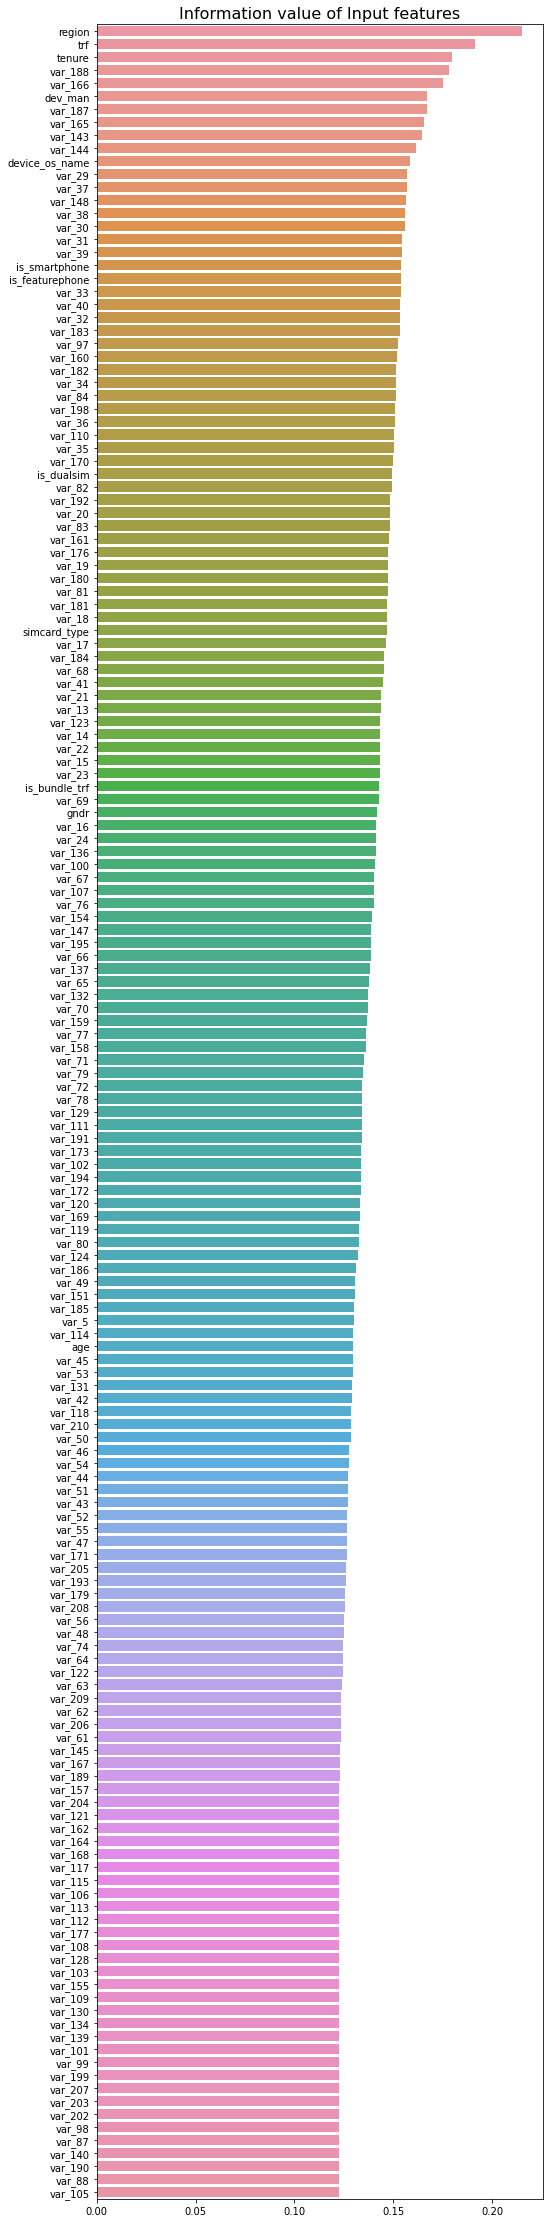

In [273]:
plt.figure(figsize=(8, 40))
info_values = info_values.sort_values(ascending=False)
sns.barplot(y = info_values.index, x=info_values.values);
plt.title('Information value of Input features', fontsize=16);

In [279]:
selected_cols = info_values[info_values>0.1].index

In [280]:
len(selected_cols)

143

In [281]:
X_train = X_train[selected_cols]
X_test = X_test[selected_cols]

In [218]:
X_train.select_dtypes(exclude='number')

,region,trf,tenure,dev_man,device_os_name,is_smartphone,is_featurephone,var_198,is_dualsim,var_20,simcard_type,var_68,is_bundle_trf,gndr,var_67
0,high,high,1,Xiaomi,Android OS,1,0,0,1,4,4G,3,1,F,2
1,high,medium,1,Samsung,Android OS,1,0,0,1,1,3G,2,1,M,1
2,high,low,4,Other,Android OS,1,0,0,1,2,4G,1,0,M,0
3,high,low,2,Samsung,Android OS,1,0,0,1,0,4G,0,0,M,0
4,high,medium,2,Xiaomi,Android OS,1,0,0,1,0,3G,1,0,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36979,medium,low,1,Samsung,Android OS,1,0,0,1,3,3G,0,0,M,0
36980,low,low,1,Xiaomi,Android OS,1,0,1,1,1,3G,3,0,M,2
36981,low,high,2,Samsung,Android OS,1,0,0,1,2,4G,1,1,U,0
36982,high,medium,3,Xiaomi,Android OS,1,0,0,1,0,4G,0,0,M,0


In [109]:
df.groupby('device_os_name', as_index=False)['target'].value_counts(normalize=True)

,device_os_name,target,proportion
0,Android OS,1.0,0.652073
1,Android OS,0.0,0.347927
2,Other,1.0,0.592593
3,Other,0.0,0.407407
4,Proprietary,0.0,0.512151
5,Proprietary,1.0,0.487849
6,iOS,1.0,0.553191
7,iOS,0.0,0.446809


In [113]:
df.groupby('dev_man', as_index=False)['target'].value_counts(normalize=True)

,dev_man,target,proportion
0,Apple,1.0,0.553191
1,Apple,0.0,0.446809
2,Hmd Global Oy,1.0,0.532562
3,Hmd Global Oy,0.0,0.467438
4,Huawei,1.0,0.666337
5,Huawei,0.0,0.333663
6,Nokia,0.0,0.590012
7,Nokia,1.0,0.409988
8,Other,1.0,0.511735
9,Other,0.0,0.488265


In [282]:
oe = OrdinalEncoder(categories=[['Proprietary', 'iOS', 'Other', 'Android OS'],
                                ['Nokia', 'Other', 'Hmd Global Oy', 'Apple', 'Samsung', 'Huawei', 'Xiaomi'],
                                ['low', 'medium', 'high'],
                                ['low', 'medium', 'high']])
X_train[['device_os_name', 'dev_man', 'region', 'trf']] = oe.fit_transform(X_train[['device_os_name', 'dev_man', 'region', 'trf']])
X_test[['device_os_name', 'dev_man', 'region', 'trf']] = oe.transform(X_test[['device_os_name', 'dev_man', 'region', 'trf']])

In [283]:
cols_to_encode = ['gndr', 'simcard_type']
ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded = pd.DataFrame(ohe.fit_transform(X_train[cols_to_encode]), columns=ohe.get_feature_names_out())
X_train = pd.concat([X_train, encoded], axis=1)
X_train.drop(cols_to_encode, axis=1, inplace=True)

encoded = pd.DataFrame(ohe.fit_transform(X_test[cols_to_encode]), columns=ohe.get_feature_names_out())
X_test = pd.concat([X_test, encoded], axis=1)
X_test.drop(cols_to_encode, axis=1, inplace=True)

In [284]:
scaler = StandardScaler()
numeric_cols = X_train._get_numeric_data().columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [285]:
print(f'Train set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Train set shape: (36984, 144)
Test set shape: (15851, 144)


In [286]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [287]:
clean_col_name = lambda col : col.replace(']', ')')
X_train.rename(mapper=clean_col_name, axis=1, inplace=True)
X_test.rename(mapper=clean_col_name, axis=1, inplace=True)

In [288]:
xgb = XGBClassifier(n_estimators=600,
                    max_depth=6,
                    min_child_weight=1.5,
                    scale_pos_weight=0.68,
                    colsample_bytree=0.8,
                    learning_rate=0.01,
                    early_stopping_rounds=40)
xgb.fit(X_train, y_train, eval_set=[(X_train, y_train),
                                    (X_test, y_test)])

[0]	validation_0-logloss:0.69166	validation_1-logloss:0.69189
[1]	validation_0-logloss:0.69018	validation_1-logloss:0.69063
[2]	validation_0-logloss:0.68873	validation_1-logloss:0.68940
[3]	validation_0-logloss:0.68742	validation_1-logloss:0.68826
[4]	validation_0-logloss:0.68599	validation_1-logloss:0.68704
[5]	validation_0-logloss:0.68460	validation_1-logloss:0.68589
[6]	validation_0-logloss:0.68332	validation_1-logloss:0.68483
[7]	validation_0-logloss:0.68197	validation_1-logloss:0.68371
[8]	validation_0-logloss:0.68067	validation_1-logloss:0.68263
[9]	validation_0-logloss:0.67950	validation_1-logloss:0.68167
[10]	validation_0-logloss:0.67830	validation_1-logloss:0.68064
[11]	validation_0-logloss:0.67701	validation_1-logloss:0.67955
[12]	validation_0-logloss:0.67584	validation_1-logloss:0.67861
[13]	validation_0-logloss:0.67470	validation_1-logloss:0.67770
[14]	validation_0-logloss:0.67348	validation_1-logloss:0.67664
[15]	validation_0-logloss:0.67227	validation_1-logloss:0.67566
[1

[130]	validation_0-logloss:0.59674	validation_1-logloss:0.61894
[131]	validation_0-logloss:0.59637	validation_1-logloss:0.61870
[132]	validation_0-logloss:0.59600	validation_1-logloss:0.61847
[133]	validation_0-logloss:0.59563	validation_1-logloss:0.61823
[134]	validation_0-logloss:0.59526	validation_1-logloss:0.61800
[135]	validation_0-logloss:0.59490	validation_1-logloss:0.61777
[136]	validation_0-logloss:0.59454	validation_1-logloss:0.61756
[137]	validation_0-logloss:0.59418	validation_1-logloss:0.61735
[138]	validation_0-logloss:0.59381	validation_1-logloss:0.61713
[139]	validation_0-logloss:0.59344	validation_1-logloss:0.61693
[140]	validation_0-logloss:0.59308	validation_1-logloss:0.61669
[141]	validation_0-logloss:0.59272	validation_1-logloss:0.61646
[142]	validation_0-logloss:0.59237	validation_1-logloss:0.61623
[143]	validation_0-logloss:0.59204	validation_1-logloss:0.61603
[144]	validation_0-logloss:0.59168	validation_1-logloss:0.61582
[145]	validation_0-logloss:0.59133	valid

[259]	validation_0-logloss:0.56107	validation_1-logloss:0.59896
[260]	validation_0-logloss:0.56087	validation_1-logloss:0.59886
[261]	validation_0-logloss:0.56064	validation_1-logloss:0.59875
[262]	validation_0-logloss:0.56042	validation_1-logloss:0.59864
[263]	validation_0-logloss:0.56021	validation_1-logloss:0.59855
[264]	validation_0-logloss:0.55998	validation_1-logloss:0.59843
[265]	validation_0-logloss:0.55982	validation_1-logloss:0.59835
[266]	validation_0-logloss:0.55960	validation_1-logloss:0.59825
[267]	validation_0-logloss:0.55939	validation_1-logloss:0.59814
[268]	validation_0-logloss:0.55919	validation_1-logloss:0.59804
[269]	validation_0-logloss:0.55897	validation_1-logloss:0.59794
[270]	validation_0-logloss:0.55875	validation_1-logloss:0.59784
[271]	validation_0-logloss:0.55854	validation_1-logloss:0.59774
[272]	validation_0-logloss:0.55835	validation_1-logloss:0.59766
[273]	validation_0-logloss:0.55816	validation_1-logloss:0.59757
[274]	validation_0-logloss:0.55798	valid

[388]	validation_0-logloss:0.53862	validation_1-logloss:0.58984
[389]	validation_0-logloss:0.53844	validation_1-logloss:0.58978
[390]	validation_0-logloss:0.53828	validation_1-logloss:0.58973
[391]	validation_0-logloss:0.53811	validation_1-logloss:0.58970
[392]	validation_0-logloss:0.53798	validation_1-logloss:0.58965
[393]	validation_0-logloss:0.53784	validation_1-logloss:0.58959
[394]	validation_0-logloss:0.53769	validation_1-logloss:0.58955
[395]	validation_0-logloss:0.53757	validation_1-logloss:0.58951
[396]	validation_0-logloss:0.53741	validation_1-logloss:0.58944
[397]	validation_0-logloss:0.53724	validation_1-logloss:0.58939
[398]	validation_0-logloss:0.53712	validation_1-logloss:0.58936
[399]	validation_0-logloss:0.53695	validation_1-logloss:0.58930
[400]	validation_0-logloss:0.53682	validation_1-logloss:0.58924
[401]	validation_0-logloss:0.53666	validation_1-logloss:0.58920
[402]	validation_0-logloss:0.53654	validation_1-logloss:0.58915
[403]	validation_0-logloss:0.53637	valid

[517]	validation_0-logloss:0.52228	validation_1-logloss:0.58492
[518]	validation_0-logloss:0.52213	validation_1-logloss:0.58488
[519]	validation_0-logloss:0.52198	validation_1-logloss:0.58484
[520]	validation_0-logloss:0.52188	validation_1-logloss:0.58483
[521]	validation_0-logloss:0.52174	validation_1-logloss:0.58480
[522]	validation_0-logloss:0.52163	validation_1-logloss:0.58477
[523]	validation_0-logloss:0.52157	validation_1-logloss:0.58476
[524]	validation_0-logloss:0.52148	validation_1-logloss:0.58474
[525]	validation_0-logloss:0.52135	validation_1-logloss:0.58472
[526]	validation_0-logloss:0.52125	validation_1-logloss:0.58470
[527]	validation_0-logloss:0.52116	validation_1-logloss:0.58467
[528]	validation_0-logloss:0.52106	validation_1-logloss:0.58465
[529]	validation_0-logloss:0.52093	validation_1-logloss:0.58464
[530]	validation_0-logloss:0.52083	validation_1-logloss:0.58460
[531]	validation_0-logloss:0.52073	validation_1-logloss:0.58459
[532]	validation_0-logloss:0.52066	valid

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=40, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1.5,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [289]:
print(f'Train set accuracy: {xgb.score(X_train, y_train)*100:.1f}%\n\
Test set accuracy: {xgb.score(X_test, y_test)*100:.1f}%')

Train set accuracy: 77.0%
Test set accuracy: 69.9%


In [290]:
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

In [291]:
print(f'Train set ROC AUC score: {roc_auc_score(y_train, xgb_train_pred)*100:.1f}%\n\
Test set ROC AUC score: {roc_auc_score(y_test, xgb_test_pred)*100:.1f}%')

Train set ROC AUC score: 75.7%
Test set ROC AUC score: 68.1%


In [292]:
print(classification_report(y_test, xgb_test_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.60      0.61      6115
         1.0       0.75      0.76      0.76      9736

    accuracy                           0.70     15851
   macro avg       0.68      0.68      0.68     15851
weighted avg       0.70      0.70      0.70     15851



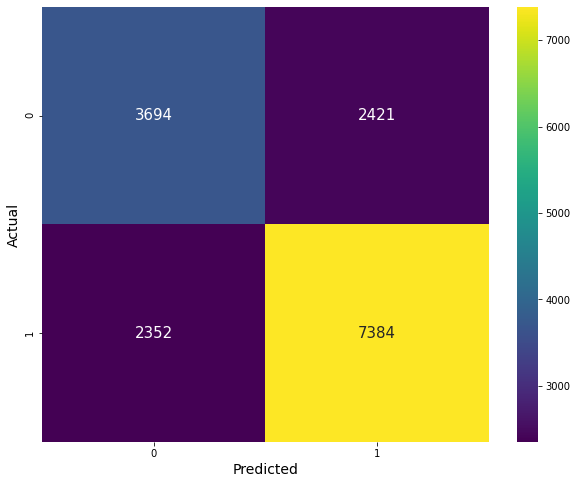

In [293]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, xgb_test_pred),
            annot=True,
            fmt='.0f',
            cmap='viridis',
            annot_kws={'size': 15})
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()

In [294]:
feat_imp = pd.Series(xgb.feature_importances_, index=xgb.feature_names_in_)
high_feature_importances = feat_imp[feat_imp>0.005].index

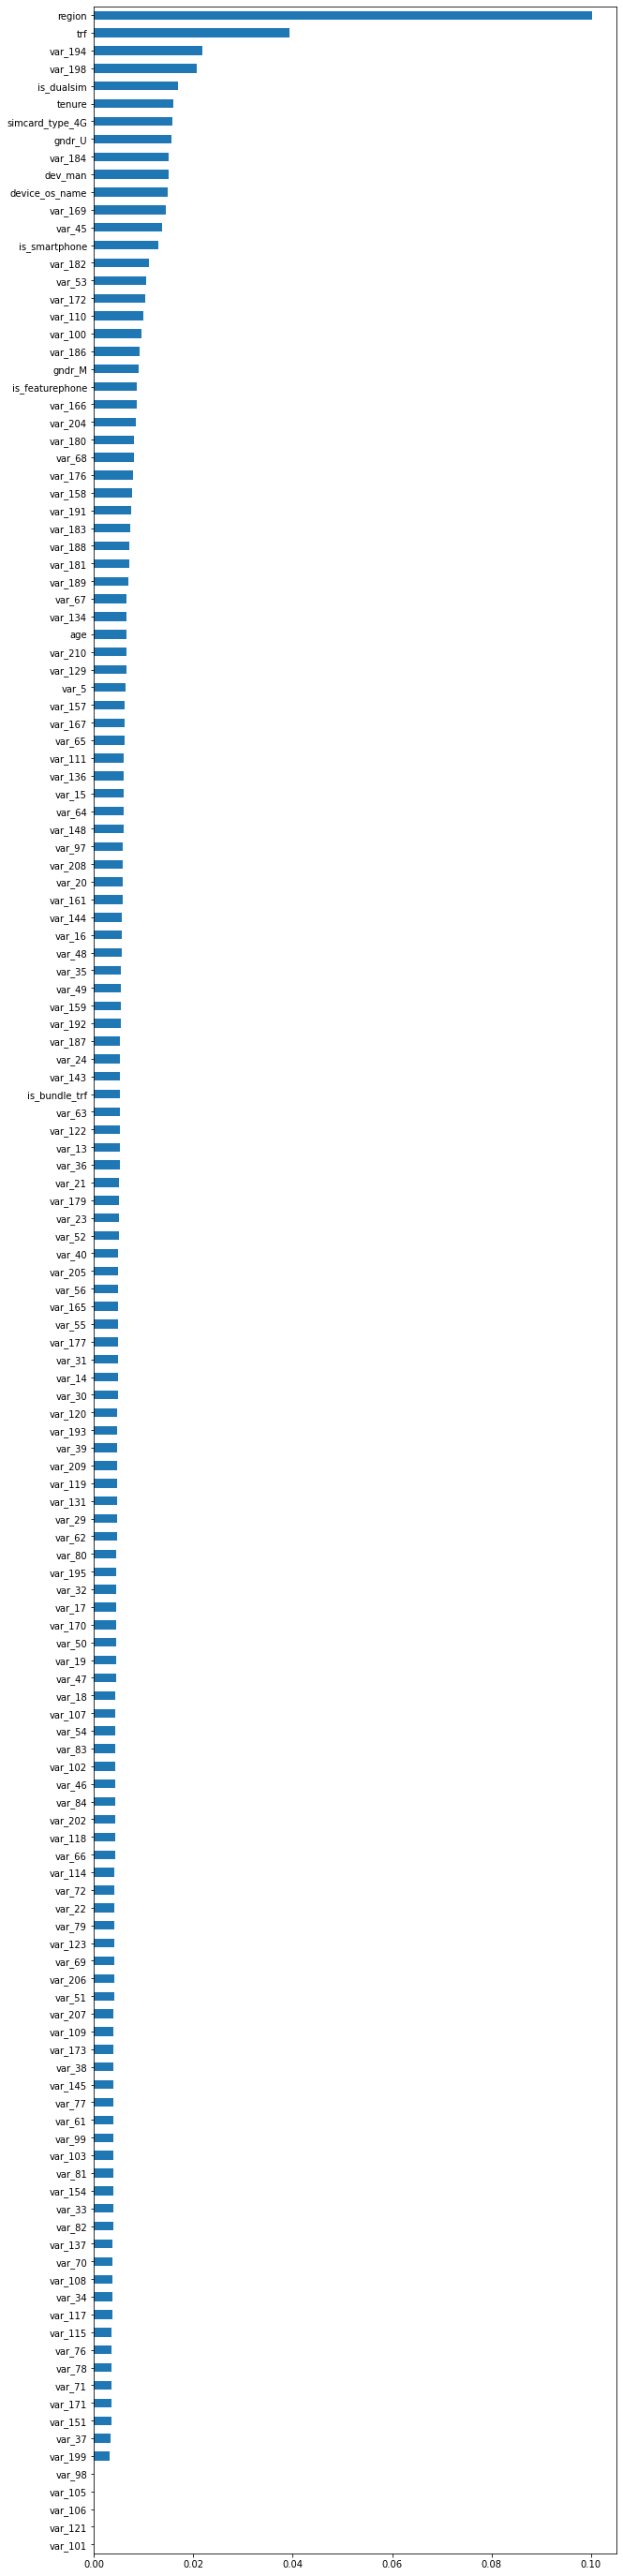

In [295]:
pd.Series(xgb.feature_importances_, index=xgb.feature_names_in_) \
.sort_values()                                       \
.plot(kind='barh',
      figsize=(10, 50));

In [297]:
xgb = XGBClassifier(n_estimators=600,
                    max_depth=5, 
                    scale_pos_weight=0.68,
                    colsample_bytree=0.7,
                    learning_rate=0.05,
                    #reg_alpha=0.05,
                    #reg_lambda=0.05,
                    early_stopping_rounds=40)
xgb.fit(X_train[high_feature_importances], y_train, eval_set=[(X_train[high_feature_importances], y_train),
                                    (X_test[high_feature_importances], y_test)])

[0]	validation_0-logloss:0.68702	validation_1-logloss:0.68769
[1]	validation_0-logloss:0.68145	validation_1-logloss:0.68266
[2]	validation_0-logloss:0.67612	validation_1-logloss:0.67794
[3]	validation_0-logloss:0.67115	validation_1-logloss:0.67367
[4]	validation_0-logloss:0.66668	validation_1-logloss:0.66992
[5]	validation_0-logloss:0.66232	validation_1-logloss:0.66620
[6]	validation_0-logloss:0.65803	validation_1-logloss:0.66245
[7]	validation_0-logloss:0.65450	validation_1-logloss:0.65943
[8]	validation_0-logloss:0.65103	validation_1-logloss:0.65634
[9]	validation_0-logloss:0.64760	validation_1-logloss:0.65347
[10]	validation_0-logloss:0.64459	validation_1-logloss:0.65099
[11]	validation_0-logloss:0.64152	validation_1-logloss:0.64846
[12]	validation_0-logloss:0.63846	validation_1-logloss:0.64585
[13]	validation_0-logloss:0.63575	validation_1-logloss:0.64359
[14]	validation_0-logloss:0.63333	validation_1-logloss:0.64163
[15]	validation_0-logloss:0.63111	validation_1-logloss:0.63984
[1

[130]	validation_0-logloss:0.54507	validation_1-logloss:0.58685
[131]	validation_0-logloss:0.54476	validation_1-logloss:0.58675
[132]	validation_0-logloss:0.54447	validation_1-logloss:0.58664
[133]	validation_0-logloss:0.54411	validation_1-logloss:0.58656
[134]	validation_0-logloss:0.54389	validation_1-logloss:0.58652
[135]	validation_0-logloss:0.54364	validation_1-logloss:0.58637
[136]	validation_0-logloss:0.54328	validation_1-logloss:0.58624
[137]	validation_0-logloss:0.54301	validation_1-logloss:0.58616
[138]	validation_0-logloss:0.54272	validation_1-logloss:0.58611
[139]	validation_0-logloss:0.54239	validation_1-logloss:0.58602
[140]	validation_0-logloss:0.54213	validation_1-logloss:0.58589
[141]	validation_0-logloss:0.54187	validation_1-logloss:0.58585
[142]	validation_0-logloss:0.54150	validation_1-logloss:0.58576
[143]	validation_0-logloss:0.54127	validation_1-logloss:0.58576
[144]	validation_0-logloss:0.54104	validation_1-logloss:0.58568
[145]	validation_0-logloss:0.54082	valid

[259]	validation_0-logloss:0.51874	validation_1-logloss:0.58235
[260]	validation_0-logloss:0.51846	validation_1-logloss:0.58224
[261]	validation_0-logloss:0.51815	validation_1-logloss:0.58220
[262]	validation_0-logloss:0.51795	validation_1-logloss:0.58223
[263]	validation_0-logloss:0.51772	validation_1-logloss:0.58225
[264]	validation_0-logloss:0.51738	validation_1-logloss:0.58217
[265]	validation_0-logloss:0.51722	validation_1-logloss:0.58215
[266]	validation_0-logloss:0.51688	validation_1-logloss:0.58203
[267]	validation_0-logloss:0.51668	validation_1-logloss:0.58201
[268]	validation_0-logloss:0.51657	validation_1-logloss:0.58200
[269]	validation_0-logloss:0.51636	validation_1-logloss:0.58201
[270]	validation_0-logloss:0.51612	validation_1-logloss:0.58198
[271]	validation_0-logloss:0.51606	validation_1-logloss:0.58202
[272]	validation_0-logloss:0.51574	validation_1-logloss:0.58193
[273]	validation_0-logloss:0.51555	validation_1-logloss:0.58188
[274]	validation_0-logloss:0.51539	valid

[388]	validation_0-logloss:0.49843	validation_1-logloss:0.58056
[389]	validation_0-logloss:0.49836	validation_1-logloss:0.58054
[390]	validation_0-logloss:0.49821	validation_1-logloss:0.58052
[391]	validation_0-logloss:0.49815	validation_1-logloss:0.58051
[392]	validation_0-logloss:0.49800	validation_1-logloss:0.58054
[393]	validation_0-logloss:0.49781	validation_1-logloss:0.58050
[394]	validation_0-logloss:0.49778	validation_1-logloss:0.58050
[395]	validation_0-logloss:0.49771	validation_1-logloss:0.58051
[396]	validation_0-logloss:0.49764	validation_1-logloss:0.58052
[397]	validation_0-logloss:0.49752	validation_1-logloss:0.58050
[398]	validation_0-logloss:0.49748	validation_1-logloss:0.58051
[399]	validation_0-logloss:0.49736	validation_1-logloss:0.58054
[400]	validation_0-logloss:0.49713	validation_1-logloss:0.58051
[401]	validation_0-logloss:0.49698	validation_1-logloss:0.58046
[402]	validation_0-logloss:0.49691	validation_1-logloss:0.58042
[403]	validation_0-logloss:0.49687	valid

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=40, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [299]:
print(f'Train set accuracy: {xgb.score(X_train[high_feature_importances], y_train)*100:.1f}%\n\
Test set accuracy: {xgb.score(X_test[high_feature_importances], y_test)*100:.1f}%')

Train set accuracy: 77.8%
Test set accuracy: 70.0%


In [301]:
xgb_test_pred = xgb.predict(X_test[high_feature_importances])

In [302]:
print(classification_report(y_test, xgb_test_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61      6115
         1.0       0.75      0.76      0.76      9736

    accuracy                           0.70     15851
   macro avg       0.68      0.68      0.68     15851
weighted avg       0.70      0.70      0.70     15851



In [ ]:
param_dist = {
    'n_estimators': [200, 300, 500, 700],  # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.3, 0.5],  # Step size shrinkage to prevent overfitting
    'max_depth': randint(3, 10),  # Maximum depth of a tree
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight needed in a child
    'gamma': uniform(0, 1),  # Minimum loss reduction required to make a further partition
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting a tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting a tree
    'scale_pos_weight': [0.38 / 0.62],  # Balancing of positive and negative weights
    'reg_alpha': [0.01, 0.1, 1, 10],  # L1 regularization term on weights
    'reg_lambda': [0.01, 0.1, 1, 10],  # L2 regularization term on weights
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', random_state=17),
    param_distributions=param_dist,
    scoring='roc_auc',  # You can use other suitable metrics here
    cv=5,  # Cross-validation folds
    n_iter=100,  # Number of parameter settings to sample
    verbose=2,
    n_jobs=-1  # Number of CPU cores to use for parallel computation
)

random_search.fit(X_train, y_train)